In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA

In [2]:
sns.set_style('darkgrid')

In [3]:
## Load the timeseries data
LTFS = pd.read_csv('Datasets/train_data.csv', parse_dates=['application_date'], index_col='application_date')
LTFS.head()

,segment,branch_id,state,zone,case_count
application_date,,,,,
2017-04-01,1,1.0,WEST BENGAL,EAST,40.0
2017-04-03,1,1.0,WEST BENGAL,EAST,5.0
2017-04-04,1,1.0,WEST BENGAL,EAST,4.0
2017-04-05,1,1.0,WEST BENGAL,EAST,113.0
2017-04-07,1,1.0,WEST BENGAL,EAST,76.0


In [4]:
LTFS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80402 entries, 2017-04-01 to 2019-07-23
Data columns (total 5 columns):
segment       80402 non-null int64
branch_id     66898 non-null float64
state         80402 non-null object
zone          66898 non-null object
case_count    80402 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 3.7+ MB


In [106]:
data1 = LTFS[LTFS.segment == 1].loc[:, 'case_count']
data2 = LTFS[LTFS.segment == 2].loc[:, 'case_count']

# Create two seperate dataframe from these two segment of data
LTFS_segment1 = pd.DataFrame(data1)
LTFS_segment2 = pd.DataFrame(data2)

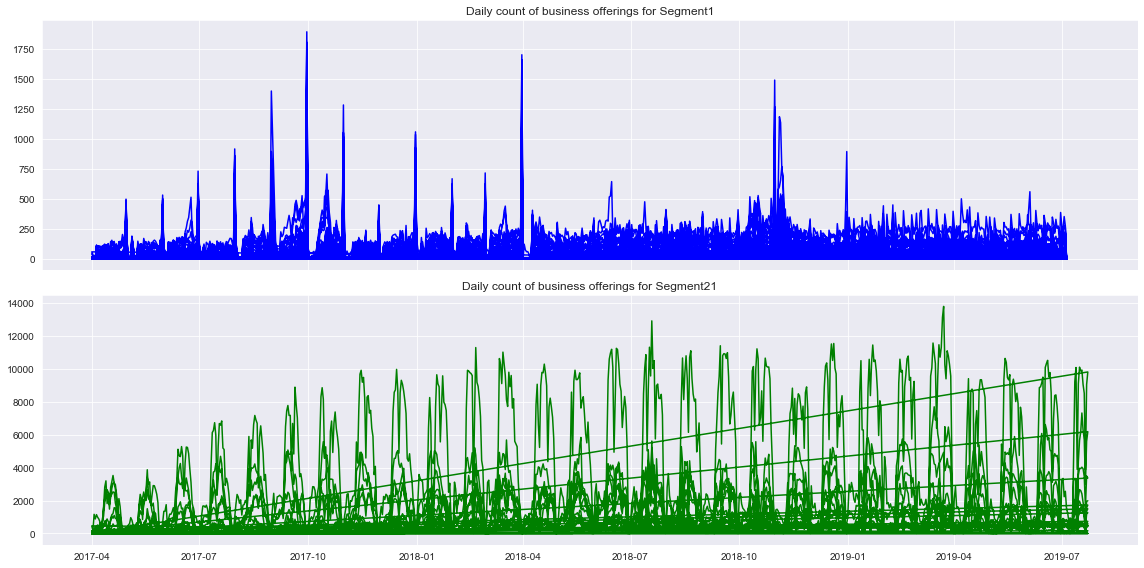

In [107]:
## Visualize The Datframe For Two Business Segment
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(16,8))
axes[0].plot(LTFS_segment1, 'b')
axes[0].set_title("Daily count of business offerings for Segment1")
axes[1].plot(LTFS_segment2, 'g')
axes[1].set_title("Daily count of business offerings for Segment21")
plt.tight_layout()
plt.show()

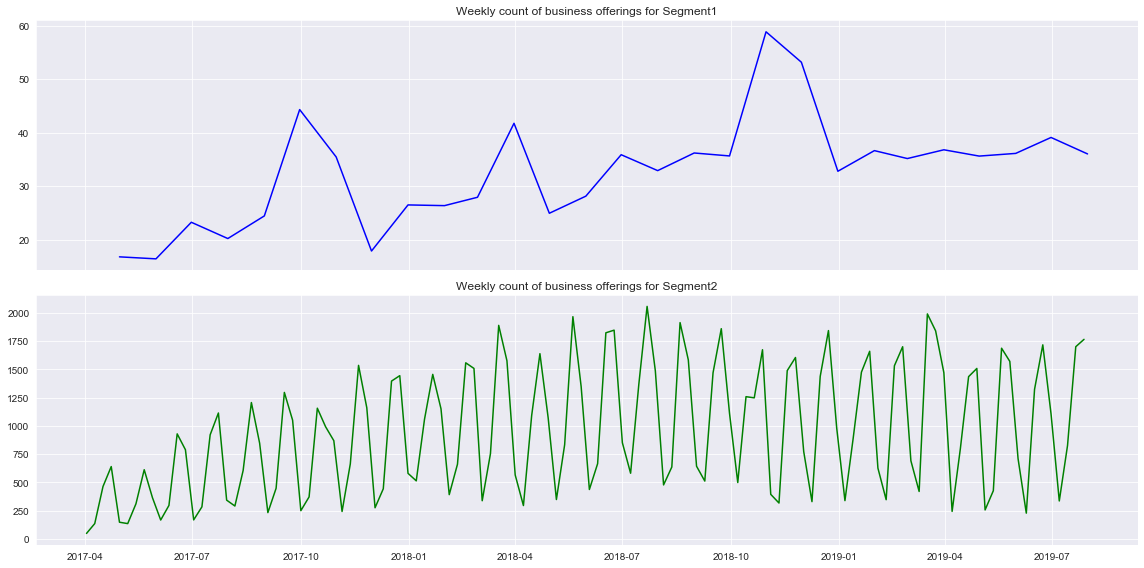

In [108]:
## Downsample The Time Series

LTFS_segment1 = pd.DataFrame(LTFS_segment1.case_count.resample(rule='M').mean())
LTFS_segment2 = pd.DataFrame(LTFS_segment2.case_count.resample(rule='W').mean())

## Visualize The Datframe For Two Business Segment
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(16,8))
axes[0].plot(LTFS_segment1, 'b')
axes[0].set_title("Weekly count of business offerings for Segment1")
axes[1].plot(LTFS_segment2, 'g')
axes[1].set_title("Weekly count of business offerings for Segment2")
plt.tight_layout()
plt.show()

## Check Stationarity

In [110]:
## Do the Adf test on the series
print("p value for time series of segment 1: %.3f" % adfuller(LTFS_segment1.case_count)[1])
print("p value for time series of segment 2: %.3f" % adfuller(LTFS_segment2.case_count)[1])

p value for time series of segment 1: 0.024
p value for time series of segment 2: 0.033


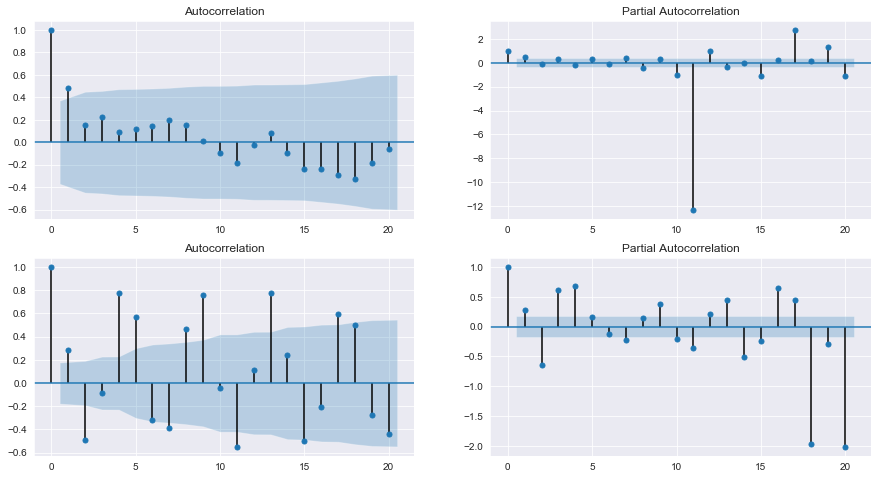

In [112]:
## Plot Atocorrelation for Time Series
fig, axes = plt.subplots(2,2, figsize=(15,8))
plot_acf(LTFS_segment1.case_count, lags=20, ax=axes[0][0])
plot_pacf(LTFS_segment1.case_count, lags=20, ax=axes[0][1])
plot_acf(LTFS_segment2.case_count, lags=20, ax=axes[1][0])
plot_pacf(LTFS_segment2.case_count, lags=20, ax=axes[1][1])
plt.show()

## Creating ARIMA Model

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


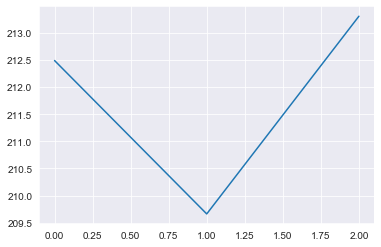

In [113]:
bics = []
for p in range(0,3):
    mod = ARIMA(LTFS_segment1, order=(2, 0, p))
    result = mod.fit()
    bics.append(result.bic)

plt.plot([i for i in range(3)], bics)
plt.show()

In [114]:
model_segment1 = ARIMA(LTFS_segment1, order=(2, 0, 1))
results_segment1 = model_segment1.fit()
print(results_segment1.summary())

                              ARMA Model Results                              
Dep. Variable:             case_count   No. Observations:                   28
Model:                     ARMA(2, 1)   Log Likelihood                 -96.500
Method:                       css-mle   S.D. of innovations              7.206
Date:                Fri, 24 Jan 2020   AIC                            203.000
Time:                        18:04:57   BIC                            209.661
Sample:                    04-30-2017   HQIC                           205.036
                         - 07-31-2019                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               32.3767      2.792     11.595      0.000      26.904      37.850
ar.L1.case_count    -0.0874      0.193     -0.452      0.655      -0.466       0.292
ar.L2.case_count     0.1318 

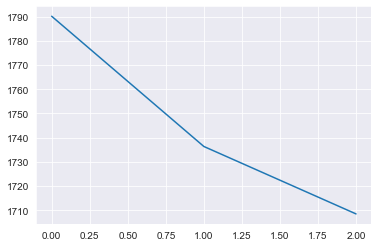

In [115]:
bics = []
for p in range(0,3):
    mod = ARIMA(LTFS_segment2, order=(3, 0, p))
    result = mod.fit()
    bics.append(result.bic)

plt.plot([i for i in range(3)], bics)
plt.show()

In [116]:
model_segment2 = ARIMA(LTFS_segment2, order=(3, 0, 2))
results_segment2 = model_segment2.fit()
print(results_segment2.summary())

                              ARMA Model Results                              
Dep. Variable:             case_count   No. Observations:                  122
Model:                     ARMA(3, 2)   Log Likelihood                -837.435
Method:                       css-mle   S.D. of innovations            225.461
Date:                Fri, 24 Jan 2020   AIC                           1688.869
Time:                        18:05:18   BIC                           1708.497
Sample:                    04-02-2017   HQIC                          1696.841
                         - 07-28-2019                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              923.4132     91.865     10.052      0.000     743.361    1103.465
ar.L1.case_count     1.1147      0.054     20.527      0.000       1.008       1.221
ar.L2.case_count    -1.2077 

## Forecasting With ARIMA Model

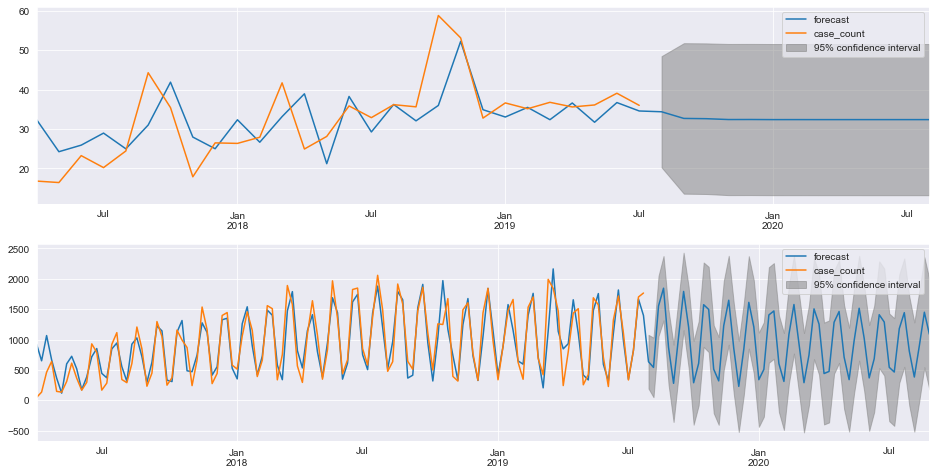

In [132]:
fig, axes = plt.subplots(2, 1, figsize=(16, 8))
results_segment1.plot_predict(start='2017-04-30', end='2020-08-31', ax=axes[0])
results_segment2.plot_predict(start='2017-04-02', end='2020-08-30', ax=axes[1])
plt.show()